# 8. Praktyczne zastosowanie analizy skupień (clustering) do zbiorów danych

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.metrics import silhouette_score


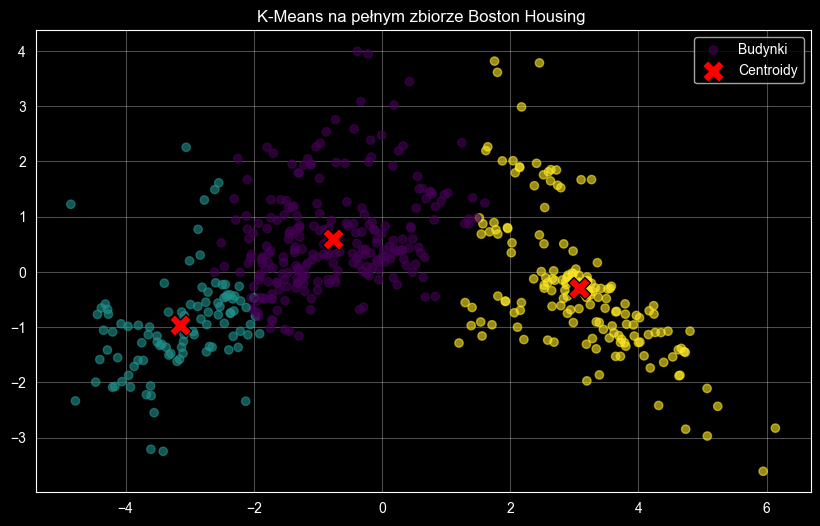

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000


In [18]:
boston = fetch_openml(name="boston", version=1, as_frame=True)
X = boston.data


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroids_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6, label='Budynki')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=250, marker='X', edgecolors='black', label='Centroidy')
plt.title("K-Means na pełnym zbiorze Boston Housing ")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
X.describe()


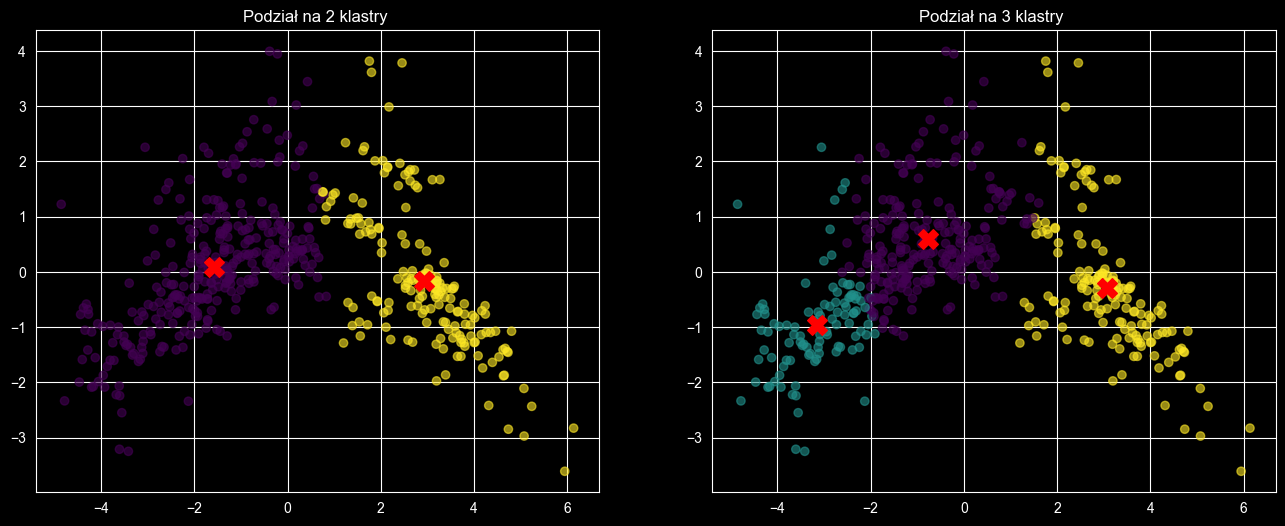

Dla 2 klastrów:  0.360, Inercja = 4196
Dla 3 klastrów:  0.257, Inercja = 3514

Średnie ceny dla 2 klastrów:
 C2
0    25.749848
1    16.553107
Name: Price, dtype: float64

Średnie ceny dla 3 klastrów:
 C3
0    24.308642
1    28.483000
2    16.234969
Name: Price, dtype: float64


In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Model dla 2 klastrów
kmeans2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels2 = kmeans2.fit_predict(X_scaled)
centroids2 = pca.transform(kmeans2.cluster_centers_)

# Model dla 3 klastrów
kmeans3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels3 = kmeans3.fit_predict(X_scaled)
centroids3 = pca.transform(kmeans3.cluster_centers_)

# Wykres 1: 2 Klastry
ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=labels2, cmap='viridis', alpha=0.6)
ax1.scatter(centroids2[:, 0], centroids2[:, 1], c='red', s=200, marker='X', label='Centroidy')
ax1.set_title("Podział na 2 klastry ")

# Wykres 2: 3 Klastry
ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=labels3, cmap='viridis', alpha=0.6)
ax2.scatter(centroids3[:, 0], centroids3[:, 1], c='red', s=200, marker='X', label='Centroidy')
ax2.set_title("Podział na 3 klastry ")

plt.show()

# miary dla 2 klastrów
sil2 = silhouette_score(X_scaled, labels2)
ine2 = kmeans2.inertia_

# miary dla 3 klastrów
sil3 = silhouette_score(X_scaled, labels3)
ine3 = kmeans3.inertia_

print(f"Dla 2 klastrów:  {sil2:.3f}, Inercja = {ine2:.0f}")
print(f"Dla 3 klastrów:  {sil3:.3f}, Inercja = {ine3:.0f}")

# Sprawdzenie cen (MEDV)
results = pd.DataFrame({'C2': labels2, 'C3': labels3, 'Price': boston.target})
print("\nŚrednie ceny dla 2 klastrów:\n", results.groupby('C2')['Price'].mean())
print("\nŚrednie ceny dla 3 klastrów:\n", results.groupby('C3')['Price'].mean())